In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-data/data.csv


In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from scipy import stats 

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("../input/ecommerce-data/data.csv", encoding="ISO-8859-1", dtype={'CustomerID': str})

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,541909,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909,NaN,NaN,NaN,9.55225,218.081,-80995,1,3,10,80995
InvoiceDate,541909,23260,10/31/2011 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909,NaN,NaN,NaN,4.61111,96.7599,-11062.1,1.25,2.08,4.13,38970
CustomerID,406829,4372,17841,7983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Missing Values**

In [7]:
data.columns[data.isnull().any()]

Index(['Description', 'CustomerID'], dtype='object')

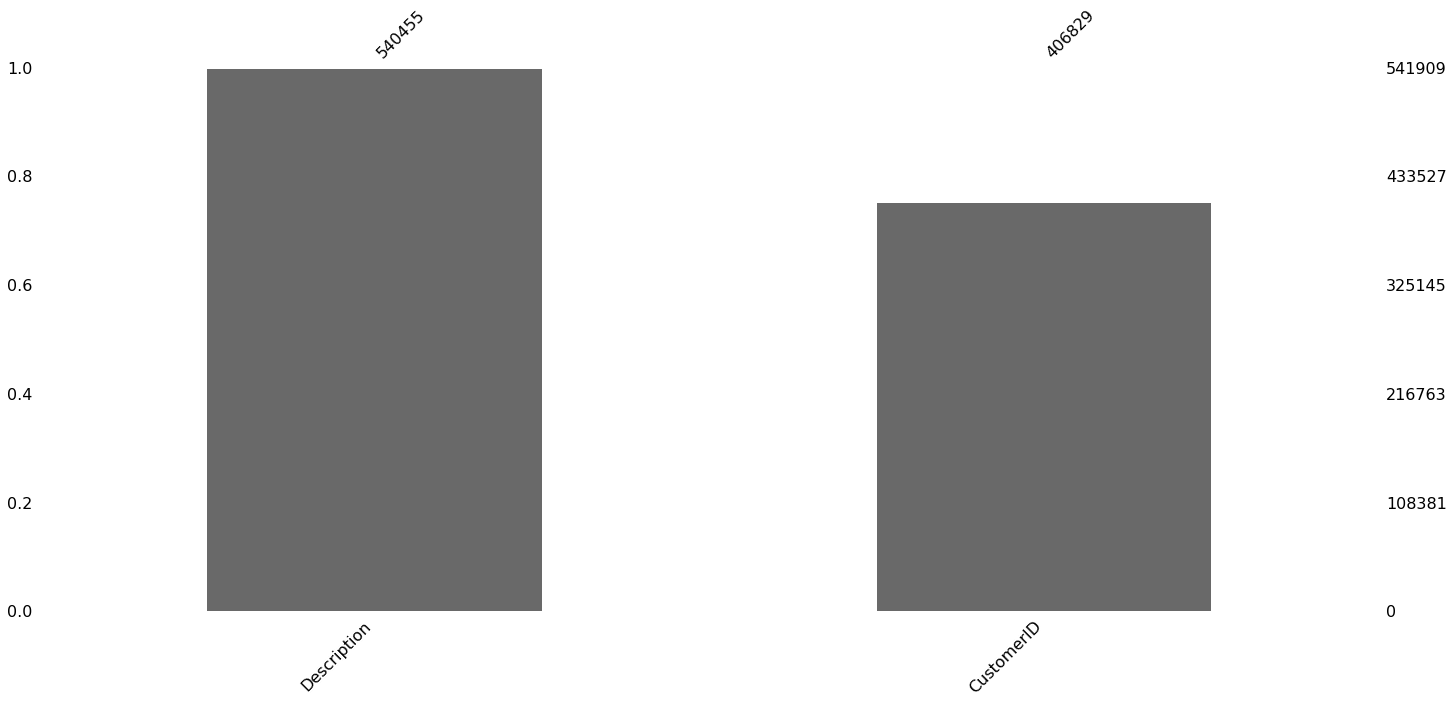

In [8]:
data_missings=data.filter(['Description', 'CustomerID'], axis=1)
msno.bar(data_missings);

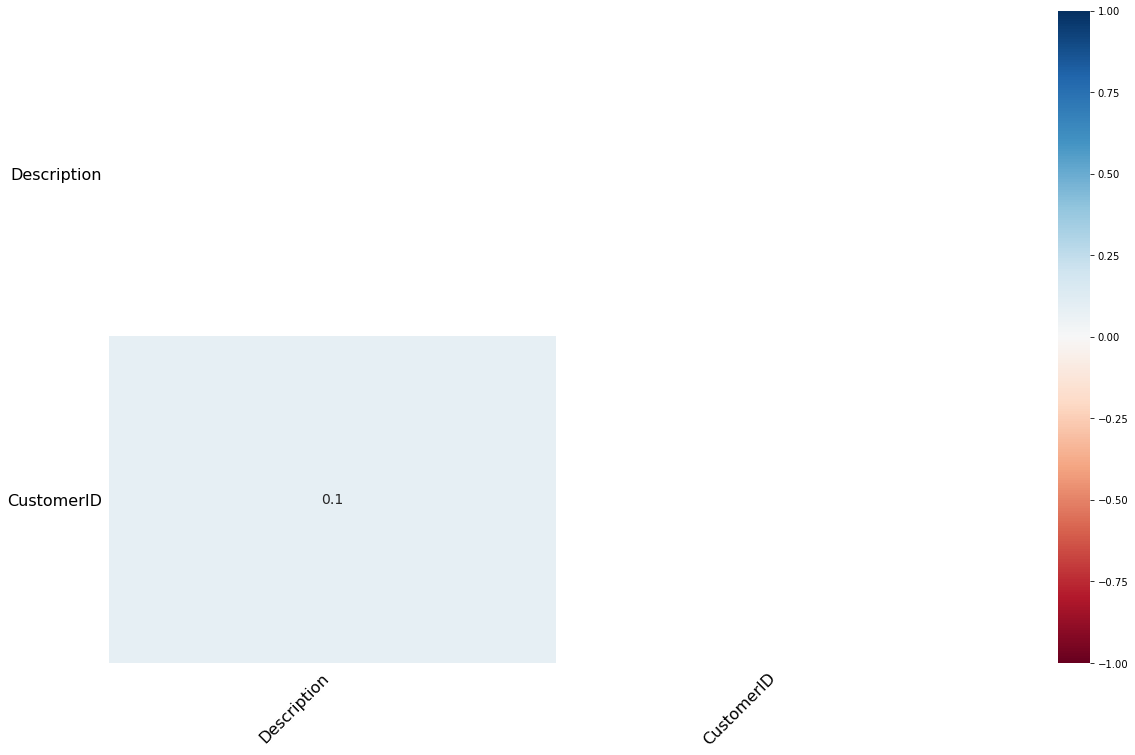

In [9]:
msno.heatmap(data); 

In [10]:
def values_table(data_missings):
    mis_val = data_missings.isnull().sum()
    mis_val_percent = 100 * data_missings.isnull().sum() / len(data_missings)
    table = pd.concat([ mis_val,mis_val_percent], axis=1)
    table = table.rename(columns = {  0 :'Missing Values', 1 : '% Missing Value'})
    table['Data Type'] = data_missings.dtypes
    table = table[table.iloc[:,1] != 0].sort_values('% Missing Value', ascending=False).round(1)
    print ("There are " + str(data.shape[1]) + " columns and " + str(data.shape[0]) + " rows in the dataset.\n"      
             + str(table.shape[0]) + " of these columns have missing variables.")
    return table

values_table(data_missings) 

# 24.9% of customer information is missing. Customer information cannot be filled in any way. However, we can investigate the cause and effects of this missingness.

There are 8 columns and 541909 rows in the dataset.
2 of these columns have missing variables.


,Missing Values,% Missing Value,Data Type
CustomerID,135080,24.9,object
Description,1454,0.3,object


In [11]:
data[data.Description.isnull()].CustomerID.isnull().value_counts(),data[data.Description.isnull()].UnitPrice.value_counts()

(True    1454
 Name: CustomerID, dtype: int64,
 0.0    1454
 Name: UnitPrice, dtype: int64)

In [12]:
data["Description_lower_case"] = data["Description"].str.lower()
data.Description_lower_case.dropna().value_counts()

white hanging heart t-light holder    2369
regency cakestand 3 tier              2200
jumbo bag red retrospot               2159
party bunting                         1727
lunch bag red retrospot               1638
                                      ... 
sold as set/6 by dotcom                  1
wrong code?                              1
16 pc cutlery set pantry design          1
marked as 23343                          1
blue crystal boot phone charm            1
Name: Description_lower_case, Length: 4206, dtype: int64

In [13]:
data[data["Description_lower_case"].str.contains("missing", na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_lower_case
165448,550800,22458,Missing,-65,4/20/2011 14:48,0.0,NaN,United Kingdom,missing
218477,556046,21890,missing,-140,6/8/2011 12:56,0.0,NaN,United Kingdom,missing
323469,565310,21829,?missing,-1897,9/2/2011 12:26,0.0,NaN,United Kingdom,?missing
324024,565385,22435,?missing,-434,9/2/2011 15:46,0.0,NaN,United Kingdom,?missing
418129,572701,85078,missing,-840,10/25/2011 14:31,0.0,NaN,United Kingdom,missing
464813,576185,22575,missing?,-130,11/14/2011 11:25,0.0,NaN,United Kingdom,missing?
493686,578245,22568,?? missing,-170,11/23/2011 12:37,0.0,NaN,United Kingdom,?? missing
497819,578476,72807B,????missing,-124,11/24/2011 12:45,0.0,NaN,United Kingdom,????missing
497820,578477,72807A,???missing,-224,11/24/2011 12:45,0.0,NaN,United Kingdom,???missing
497821,578478,72807C,???missing,-428,11/24/2011 12:45,0.0,NaN,United Kingdom,???missing


In [14]:
data[data["Description_lower_case"].str.contains("[?]", na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_lower_case
7313,537032,21275,?,-30,12/3/2010 16:50,0.0,NaN,United Kingdom,?
21518,538090,20956,?,-723,12/9/2010 14:48,0.0,NaN,United Kingdom,?
38261,539494,21479,?,752,12/20/2010 10:36,0.0,NaN,United Kingdom,?
43662,540100,22837,?,-106,1/4/2011 16:53,0.0,NaN,United Kingdom,?
50806,540558,21258,?,-29,1/10/2011 10:04,0.0,NaN,United Kingdom,?
...,...,...,...,...,...,...,...,...,...
514649,579734,84859C,wet?,-153,11/30/2011 14:25,0.0,NaN,United Kingdom,wet?
514735,579742,85204,lost??,-1131,11/30/2011 14:34,0.0,NaN,United Kingdom,lost??
524370,580547,21201,???,-390,12/5/2011 9:29,0.0,NaN,United Kingdom,???
535324,581201,22217,damages?,-155,12/7/2011 18:30,0.0,NaN,United Kingdom,damages?


In [15]:
data[data["Description_lower_case"].str.startswith("nan", na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_lower_case


In [16]:
data.loc[data.Description_lower_case.isnull()==False, "Description_lower_case"] = data.loc[
    data.Description_lower_case.isnull()==False, "Description_lower_case"
].apply(lambda x: np.where("missing" in x, None, x))

In [17]:
data[data["Description_lower_case"].str.contains("missing", na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_lower_case


In [18]:
data.loc[data.Description_lower_case.isnull()==False, "Description_lower_case"] = data.loc[
    data.Description_lower_case.isnull()==False, "Description_lower_case"
].apply(lambda x: np.where("?" in x, None, x))

In [19]:
data[data["Description_lower_case"].str.contains("[?]", na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_lower_case


In [20]:
data.isnull().sum()

InvoiceNo                      0
StockCode                      0
Description                 1454
Quantity                       0
InvoiceDate                    0
UnitPrice                      0
CustomerID                135080
Country                        0
Description_lower_case      1540
dtype: int64

In [21]:
df= data.dropna()

In [22]:
df.isnull().sum()

InvoiceNo                 0
StockCode                 0
Description               0
Quantity                  0
InvoiceDate               0
UnitPrice                 0
CustomerID                0
Country                   0
Description_lower_case    0
dtype: int64

In [23]:
df=df.drop(['Description'], axis=1)

In [24]:
df.duplicated().sum()

5225

In [25]:
df.drop_duplicates(inplace = True)

In [26]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')
df['CustomerID'] = df['CustomerID'].astype('int64')

In [27]:
df.insert(loc=2, column='Year', value=df.InvoiceDate.dt.year)
df.insert(loc=3, column='Month', value=df.InvoiceDate.dt.month)
df.insert(loc=4, column='Day', value=(df.InvoiceDate.dt.dayofweek)+1)

# Grouping Data

In [28]:
df_1=df.groupby(['Country'], as_index=False)["InvoiceNo"].count()
df_1=df_1.sort_values(by='InvoiceNo', ascending=False).head(10)

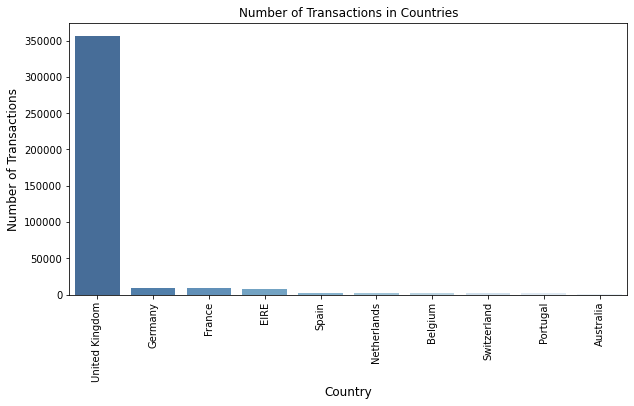

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(df_1.Country, df_1.InvoiceNo, alpha=0.8,palette="Blues_r")
plt.title('Number of Transactions in Countries')
plt.ylabel('Number of Transactions', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=90)
plt.show()

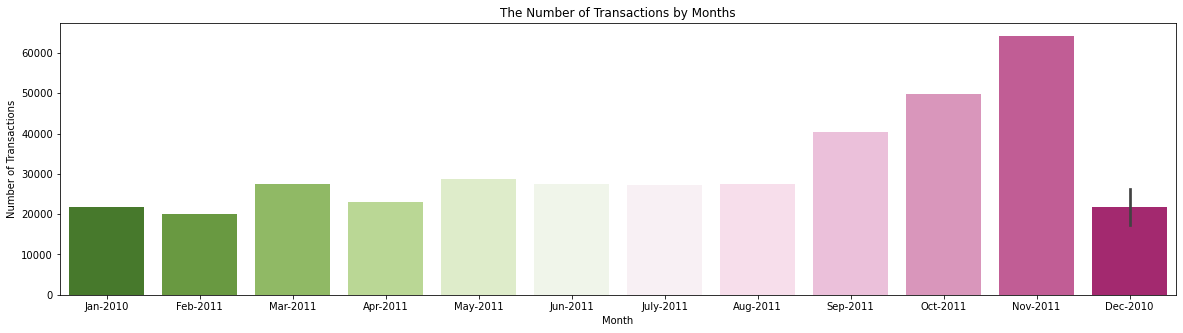

In [30]:
df_2=df.groupby(['Month','Year'], as_index=False)["InvoiceNo"].count()
plt.figure(figsize=(20,5))
sns.barplot(df_2.Month, df_2.InvoiceNo,palette="PiYG_r")
plt.ylabel("Number of Transactions")
plt.title("The Number of Transactions by Months")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan-2010','Feb-2011','Mar-2011','Apr-2011','May-2011','Jun-2011','July-2011','Aug-2011','Sep-2011','Oct-2011','Nov-2011','Dec-2010']);

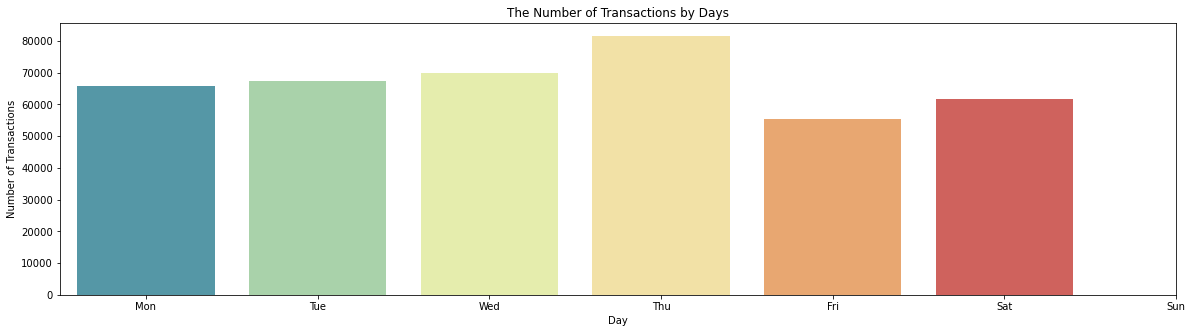

In [31]:
df_3=df.groupby(['Day'], as_index=False)["InvoiceNo"].count()
plt.figure(figsize=(20,5))
sns.barplot(df_3.Day, df_3.InvoiceNo,palette="Spectral_r")
plt.ylabel("Number of Transactions")
plt.title("The Number of Transactions by Days")
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun']);

In [32]:
df_4= df.groupby(['CustomerID', 'InvoiceNo'], as_index=False)['Quantity'].sum()
df_4=df_4.sort_values(by='CustomerID')
df_4

,CustomerID,InvoiceNo,Quantity
0,12346,541431,74215
1,12346,C541433,-74215
2,12347,537626,319
3,12347,542237,315
4,12347,549222,483
...,...,...,...
22177,18283,557956,146
22186,18283,580872,142
22188,18287,570715,990
22187,18287,554065,488


In [33]:
df['Canceled_orders'] = df['InvoiceNo'].apply(lambda x:int('C' in x))
df_5=pd.DataFrame([{'Customers': len(df['CustomerID'].value_counts()),
               'Products': len(df['StockCode'].value_counts()),    
               'Orders': (df['Canceled_orders'].values == 0).sum(),
               'Canceled_orders' : (df['Canceled_orders'].values == 1).sum()}],index=['num.'])
df_5

,Customers,Products,Orders,Canceled_orders
num.,4372,3684,392732,8872


In [34]:
df_6=df[df['Canceled_orders'] == 1].groupby(['CustomerID', 'InvoiceNo','Canceled_orders'],
                                            as_index=False)['Quantity'].sum()
df_6.head()

,CustomerID,InvoiceNo,Canceled_orders,Quantity
0,12346,C541433,1,-74215
1,12352,C545329,1,-2
2,12352,C545330,1,-1
3,12352,C547388,1,-63
4,12359,C549955,1,-4


In [35]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity'] 
df_7= df.groupby(['CustomerID','InvoiceNo'], as_index=False)['TotalPrice'].sum()
df_7=df_7.sort_values(by='CustomerID')
df_7

,CustomerID,InvoiceNo,TotalPrice
0,12346,541431,77183.60
1,12346,C541433,-77183.60
2,12347,537626,711.79
3,12347,542237,475.39
4,12347,549222,636.25
...,...,...,...
22177,18283,557956,192.80
22186,18283,580872,208.00
22188,18287,570715,1001.32
22187,18287,554065,765.28


In [36]:
df_7=df[df.UnitPrice == 0].groupby(['CustomerID', 'StockCode','Description_lower_case'],
                                            as_index=False)['Quantity'].sum()
df_7.head()

,CustomerID,StockCode,Description_lower_case,Quantity
0,12415,22619,set of 6 soldier skittles,80
1,12415,23234,biscuit tin vintage christmas,216
2,12431,22385,jumbo bag spaceboy design,12
3,12437,M,manual,1
4,12444,23407,set of 2 trays home sweet home,2


In [37]:
df_7=df[df.UnitPrice == 0].groupby(['CustomerID', 'InvoiceNo','Description_lower_case'],
                                            as_index=False)['Quantity'].sum()
df_7.head()

,CustomerID,InvoiceNo,Description_lower_case,Quantity
0,12415,554037,set of 6 soldier skittles,80
1,12415,574138,biscuit tin vintage christmas,216
2,12431,574469,jumbo bag spaceboy design,12
3,12437,574252,manual,1
4,12444,577314,set of 2 trays home sweet home,2


In [38]:
df_8=df.groupby("StockCode").Description_lower_case.nunique()
df_8=df_8.sort_values(ascending=False).to_frame()
display(df_8.loc[df_8.Description_lower_case >1 ].head());
display(df.loc[df.StockCode == "23196"
              ].Description_lower_case.value_counts().to_frame());

,Description_lower_case
StockCode,
23196,4
23236,4
23203,3
23370,3
22776,3


,Description_lower_case
vintage leaf magnetic notepad,218
retro leaves magnetic notepad,19
reto leaves magnetic shopping list,3
leaves magnetic shopping list,2


# Outlier Handling

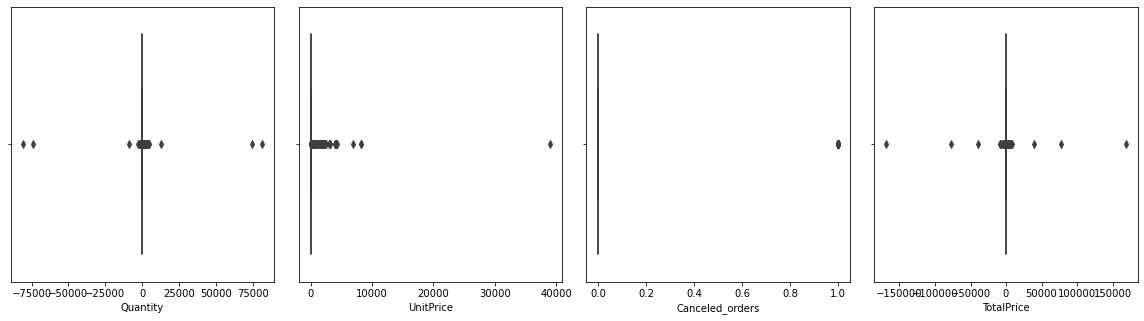

In [39]:
df_outliers=df.filter([ 'Quantity', 'UnitPrice', 'Canceled_orders', 'TotalPrice'],axis=1)
plt.figure(figsize=(20,35))
for num,col in enumerate(df_outliers.columns,1):
    plt.subplot(8, 5, num)
    sns.boxplot(df_outliers[col])
    plt.tight_layout()

In [40]:
df.loc[:, ["Quantity", "UnitPrice","TotalPrice"]].describe()

,Quantity,UnitPrice,TotalPrice
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,20.613638
std,250.283037,69.764035,430.352218
min,-80995.000000,0.000000,-168469.600000
25%,2.000000,1.250000,4.250000
50%,5.000000,1.950000,11.700000
75%,12.000000,3.750000,19.800000
max,80995.000000,38970.000000,168469.600000


In [41]:
df_new=df.select_dtypes(include=['int', 'float'])

outliers={}
for col in df_new:
    lower_lim = df_new[col].quantile(q=0.01)
    upper_lim = df_new[col].quantile(q=0.99)
    outliers[col] =  len(df_new[col][(df_new[col] > upper_lim)| (df_new[col] < lower_lim)])

In [42]:
outliers_hardedge=pd.DataFrame(outliers.items(),columns=['Feature','Outliers'])
outliers_hardedge 

,Feature,Outliers
0,UnitPrice,6880
1,TotalPrice,7992


Too many outliers detected.It would not be right to remove it from the data immediately
because big data loss is not something we want. Let's try to visualize it as below.

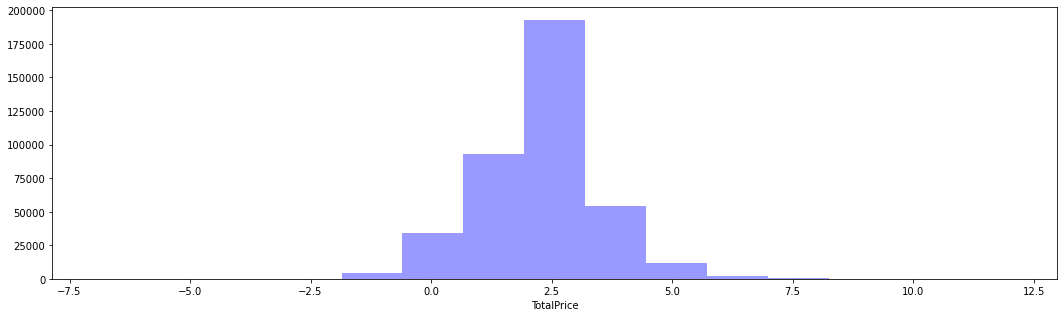

In [43]:
df_pozitive= df.loc[df.TotalPrice > 0].copy()
plt.figure(figsize=(18,5))
sns.distplot(np.log(df_pozitive.TotalPrice), bins=15, kde=False, color="blue");

In [44]:
np.exp(-2.5),np.exp(8)

(0.0820849986238988, 2980.9579870417283)

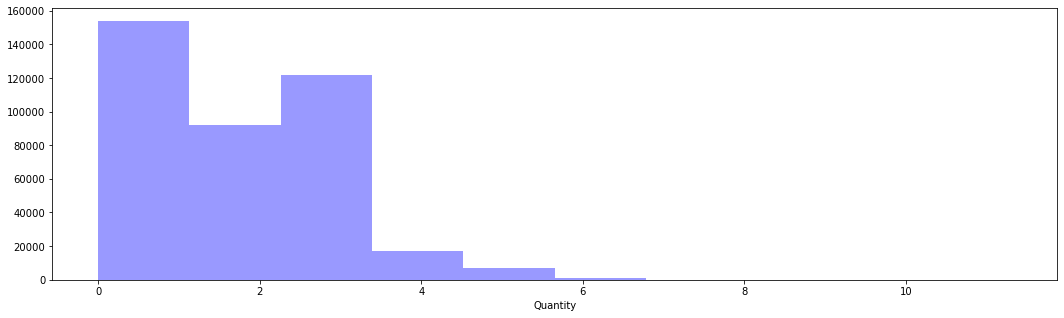

In [45]:
plt.figure(figsize=(18,5))
sns.distplot(np.log(df.Quantity), bins=10, kde=False, color="blue");

In [46]:
np.exp(0),np.exp(6.5)

(1.0, 665.1416330443618)

In [47]:
a=df["Quantity"].count()
b=df["Quantity"].loc[(df.Quantity <666 )].count()
c=a-b
a,b,c #We can extract 234 of them from the data

(401604, 401370, 234)

we can drop 234 of the quantity from the data

In [48]:
m=df["TotalPrice"].count()
n=df["TotalPrice"].loc[(df.TotalPrice >0.08) & (df.TotalPrice <2981 ) ].count()
k=m-n
m,n,k

(401604, 392641, 8963)

we can drop 8963 of the total price from the data.Again, it means a high number of outliers, so we can drop according to the hard edge method. But it is useful to do it after seeing the reaction of the model.

# Correlation

In [49]:
df.corr()

,Year,Month,Day,Quantity,UnitPrice,CustomerID,Canceled_orders,TotalPrice
Year,1.000000,-0.341560,-0.016204,0.001041,0.000978,-0.035279,-0.006760,-0.000213
Month,-0.341560,1.000000,0.025144,-0.002354,-0.003140,0.029855,-0.012708,-0.001811
Day,-0.016204,0.025144,1.000000,-0.004750,-0.002964,0.020804,-0.028136,-0.004747
Quantity,0.001041,-0.002354,-0.004750,1.000000,-0.001243,-0.003457,-0.025798,0.916130
UnitPrice,0.000978,-0.003140,-0.002964,-0.001243,1.000000,-0.004524,0.033233,-0.129311
CustomerID,-0.035279,0.029855,0.020804,-0.003457,-0.004524,1.000000,-0.025519,-0.002130
Canceled_orders,-0.006760,-0.012708,-0.028136,-0.025798,0.033233,-0.025519,1.000000,-0.031161
TotalPrice,-0.000213,-0.001811,-0.004747,0.916130,-0.129311,-0.002130,-0.031161,1.000000


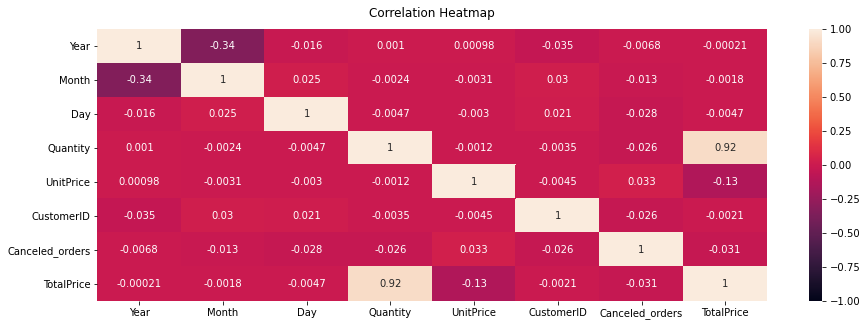

In [50]:
plt.figure(figsize=(15, 5))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);